## Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path

## Read Data

In [2]:
now_dir = os.getcwd()
print(now_dir)
data_dir = now_dir + '/data'
data_dir

c:\바탕 화면\Code\daily_code\1.AI(ML,DL)\DACON\제주 특산물 가격 예측


'c:\\바탕 화면\\Code\\daily_code\\1.AI(ML,DL)\\DACON\\제주 특산물 가격 예측/data'

In [3]:
os.listdir(data_dir)

['international_trade.csv', 'sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
train = pd.read_csv(data_dir +'/train.csv')
test = pd.read_csv(data_dir +'/test.csv')
international_trade = pd.read_csv(data_dir + '/international_trade.csv')
submission = pd.read_csv(data_dir + '/sample_submission.csv')

In [5]:
train.shape, test.shape, international_trade.shape

((59397, 7), (1092, 5), (1274, 7))

In [6]:
train.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [7]:
train.tail()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0
59396,RD_F_J_20230303,2023-03-03,RD,F,J,427520.0,529.0


In [8]:
test.head()

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J


In [9]:
international_trade.head()

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38


## EDA

### Train

In [10]:
train.head(), train.shape

(                ID   timestamp item corporation location  supply(kg)  \
 0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
 1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
 2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   
 3  TG_A_J_20190104  2019-01-04   TG           A        J     25000.0   
 4  TG_A_J_20190105  2019-01-05   TG           A        J     32352.0   
 
    price(원/kg)  
 0          0.0  
 1          0.0  
 2       1728.0  
 3       1408.0  
 4       1250.0  ,
 (59397, 7))

In [11]:
train.describe(include='object')

,ID,timestamp,item,corporation,location
count,59397,59397,59397,59397,59397
unique,59397,1523,5,6,2
top,TG_A_J_20190101,2019-01-01,TG,A,J
freq,1,39,15230,13707,35029


In [12]:
train['timestamp'].value_counts()

2019-01-01    39
2021-10-09    39
2021-10-18    39
2021-10-17    39
2021-10-16    39
              ..
2020-05-20    39
2020-05-19    39
2020-05-18    39
2020-05-17    39
2023-03-03    39
Name: timestamp, Length: 1523, dtype: int64

In [13]:
'''
item: 품목 코드
TG : 감귤
BC : 브로콜리
RD : 무
CR : 당근
CB : 양배추
'''
train['item'].value_counts()


TG    15230
BC    13707
RD    12184
CR    10661
CB     7615
Name: item, dtype: int64

In [14]:
train['corporation'].value_counts()

A    13707
E    13707
D    12184
C     9138
B     7615
F     3046
Name: corporation, dtype: int64

In [15]:
'''
J : 제주도 제주시
S : 제주도 서귀포시
'''
train['location'].value_counts()


J    35029
S    24368
Name: location, dtype: int64

In [24]:
train.groupby(['item']).mean()

,supply(kg),price(원/kg)
item,,
BC,1000.060071,910.196615
CB,11241.532567,152.187131
CR,5054.161992,273.118938
RD,27670.840003,187.073539
TG,14193.242484,3177.442022


In [34]:
train_TG = train.loc[train['item'] == 'TG']
train_TG


,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...,...
15225,TG_E_S_20230227,2023-02-27,TG,E,S,24204.0,3418.0
15226,TG_E_S_20230228,2023-02-28,TG,E,S,13587.0,3141.0
15227,TG_E_S_20230301,2023-03-01,TG,E,S,16187.0,4235.0
15228,TG_E_S_20230302,2023-03-02,TG,E,S,17830.0,3960.0


In [38]:
train_TG['timestamp'].value_counts()

2019-01-01    10
2021-10-09    10
2021-10-18    10
2021-10-17    10
2021-10-16    10
              ..
2020-05-20    10
2020-05-19    10
2020-05-18    10
2020-05-17    10
2023-03-03    10
Name: timestamp, Length: 1523, dtype: int64

In [39]:
train_TG[train_TG['timestamp'] == '2019-01-01']

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1523,TG_A_S_20190101,2019-01-01,TG,A,S,0.0,0.0
3046,TG_B_J_20190101,2019-01-01,TG,B,J,0.0,0.0
4569,TG_B_S_20190101,2019-01-01,TG,B,S,0.0,0.0
6092,TG_C_J_20190101,2019-01-01,TG,C,J,0.0,0.0
7615,TG_C_S_20190101,2019-01-01,TG,C,S,0.0,0.0
9138,TG_D_J_20190101,2019-01-01,TG,D,J,0.0,0.0
10661,TG_D_S_20190101,2019-01-01,TG,D,S,0.0,0.0
12184,TG_E_J_20190101,2019-01-01,TG,E,J,0.0,0.0
13707,TG_E_S_20190101,2019-01-01,TG,E,S,0.0,0.0


<AxesSubplot:xlabel='timestamp', ylabel='price(원/kg)'>

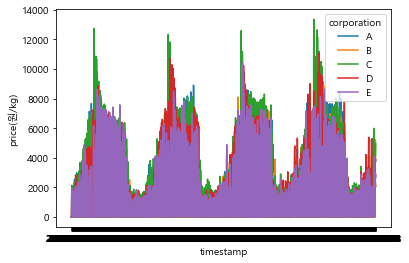

In [37]:
sns.lineplot(data=train_TG, x='timestamp', y='price(원/kg)',ci=None, hue='corporation')

### International Trade

In [16]:
international_trade.head(), international_trade.shape

(        기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지
 0  2019-01  토마토(신선한 것이나 냉장한 것으로 한정한다)  356571    990        0      0   990
 1  2019-01                         양파  821330    222  4003206   1118  -896
 2  2019-01                         쪽파      60      1    93405    128  -127
 3  2019-01       꽃양배추와 브로콜리(broccoli)     160      1   638913    563  -562
 4  2019-01                  방울다다기 양배추       0      0     7580     38   -38,
 (1274, 7))

In [17]:
international_trade['품목명'].value_counts()

감귤                                                                               50
포포(papaw)[파파야(papaya)]                                                           50
레몬[시트러스 리몬(Citrus limon)ㆍ시트러스 리머늄(Citrus limonum)]                               50
그레이프프루트(grapefruit)와 포멜로(pomelo)                                                 50
오렌지                                                                              50
망고(mango)                                                                        50
파인애플                                                                             50
무화과                                                                              50
대추야자                                                                             50
사과                                                                               50
오이류(신선한 것이나 냉장한 것으로 한정한다)                                                        50
당근                                                                          